# Importing Libraries and Data Visualization

In [ ]:
# Some library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
pip install keras

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV file from Google Drive
file_path = '/content/drive/MyDrive/results.csv'
res = pd.read_csv("https://drive.google.com/uc?id=1rC1J3LrIQ0LfeOqq8__hbWmIuxsfrudV")

# All columns for frequency histogram
cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
res = pd.read_csv('/content/drive/MyDrive/CSE422/Project/results.csv') # read csv file
# All columns for frequency histogram
cols = ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

In [ ]:
for i in res.columns:
  print(f"{i} - {res[i].nunique()}")

Age - 13
Sex - 2
HighChol - 2
CholCheck - 2
BMI - 80
Smoker - 2
HeartDiseaseorAttack - 2
PhysActivity - 2
Fruits - 2
Veggies - 2
HvyAlcoholConsump - 2
GenHlth - 5
MentHlth - 31
PhysHlth - 31
DiffWalk - 2
Stroke - 2
HighBP - 2
Diabetes - 2


# Without Data Preprocessing

In [ ]:
x = res.drop(['Diabetes'], axis=1) # Excluding diabetes, as it is our target
x

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
y = res['Diabetes'] # Our target
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes, Length: 70692, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=40)

# With Data Preprocessing

In [ ]:
res.isnull().sum() # Checking null values (found)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(res[['Age']])
res['Age'] = impute.transform(res[['Age']])

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(res[['BMI']])
res['BMI'] = impute.transform(res[['BMI']])

In [ ]:
res.isnull().sum() # Checking null values (not found any)

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
res = res.drop([cols[1], cols[5], cols[7], cols[8], cols[9], cols[10], cols[12]], axis=1)
res

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,0.0,1.0,26.0,0.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,1.0,1.0,37.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,29.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,1.0,1.0,25.0,1.0,5.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,1.0,1.0,18.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
x = res.drop(['Diabetes'], axis=1)
y = res['Diabetes']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training accuracy (%) =", lr.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", lr.score(x_test,y_test)*100)

Training accuracy (%) = 30.241192402651194
Testing accuracy (%) = 30.261117651353565


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load your dataset
# Assuming you've loaded your dataset into 'res'

# Split the data into features (x) and target (y)
x = res.drop(['Diabetes'], axis=1)
y = res['Diabetes']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape the input data for RNN
# RNNs expect input data in the shape of (batch_size, time_steps, features)
time_steps = 1  # You can experiment with this value
x_train_rnn = x_train.reshape(-1, time_steps, x_train.shape[1])
x_test_rnn = x_test.reshape(-1, time_steps, x_test.shape[1])

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, x_train.shape[1])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
1238/1238 [==============================] - 10s 4ms/step - loss: 0.5213 - accuracy: 0.7382 - val_loss: 0.5066 - val_accuracy: 0.7499
Epoch 2/10
1238/1238 [==============================] - 6s 5ms/step - loss: 0.5085 - accuracy: 0.7484 - val_loss: 0.5063 - val_accuracy: 0.7548
Epoch 3/10
1238/1238 [==============================] - 6s 5ms/step - loss: 0.5076 - accuracy: 0.7482 - val_loss: 0.5053 - val_accuracy: 0.7517
Epoch 4/10
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5072 - accuracy: 0.7479 - val_loss: 0.5060 - val_accuracy: 0.7512
Epoch 5/10
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5067 - accuracy: 0.7487 - val_loss: 0.5055 - val_accuracy: 0.7525
Epoch 6/10
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5066 - accuracy: 0.7479 - val_loss: 0.5057 - val_accuracy: 0.7519
Epoch 7/10
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5063 - accuracy: 0.7498 - val_loss: 0.5058 - val_accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


# Split the data into features (x) and target (y)
x = res.drop(['Diabetes'], axis=1)
y = res['Diabetes']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape the input data for RNN
time_steps = 1
x_train_rnn = x_train.reshape(-1, time_steps, x_train.shape[1])
x_test_rnn = x_test.reshape(-1, time_steps, x_test.shape[1])

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, x_train.shape[1]), use_bias=False))  # Vanilla RNN
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
1238/1238 [==============================] - 5s 3ms/step - loss: 0.5203 - accuracy: 0.7405 - val_loss: 0.5073 - val_accuracy: 0.7490
Epoch 2/10
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5091 - accuracy: 0.7475 - val_loss: 0.5068 - val_accuracy: 0.7498
Epoch 3/10
1238/1238 [==============================] - 7s 6ms/step - loss: 0.5079 - accuracy: 0.7475 - val_loss: 0.5068 - val_accuracy: 0.7516
Epoch 4/10
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5076 - accuracy: 0.7477 - val_loss: 0.5062 - val_accuracy: 0.7511
Epoch 5/10
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5072 - accuracy: 0.7481 - val_loss: 0.5065 - val_accuracy: 0.7520
Epoch 6/10
1238/1238 [==============================] - 5s 4ms/step - loss: 0.5069 - accuracy: 0.7490 - val_loss: 0.5059 - val_accuracy: 0.7532
Epoch 7/10
1238/1238 [==============================] - 4s 3ms/step - loss: 0.5067 - accuracy: 0.7485 - val_loss: 0.5064 - val_accuracy:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Reshape x_train and x_test to have a 3D shape
sequence_length = 17  # Assuming each sequence has a length of 17
x_train_3d = x_train.reshape(x_train.shape[0], sequence_length, x_train.shape[1])
x_test_3d = x_test.reshape(x_test.shape[0], sequence_length, x_test.shape[1])


# Build the Simple RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu'))  # No need for input_shape
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the RNN
loss, accuracy = model.evaluate(x_test, y_test)
print("Testing loss =", loss)
print("Testing accuracy =", accuracy)


AttributeError: ignored

In [ ]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=500)
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 74.56349527119878
Testing accuracy (%) = 74.65579026782346


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

print("Training accuracy (%) =", tree.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", tree.score(x_test,y_test)*100)

Training accuracy (%) = 87.69097081885053
Testing accuracy (%) = 68.37042625424368


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)

print("Training accuracy (%) =", forest.score(x_train,y_train) * 100)
print("Testing accuracy (%) =", forest.score(x_test,y_test)*100)

Training accuracy (%) = 87.68692910839867
Testing accuracy (%) = 71.39758581667294


In [ ]:
from sklearn.neural_network import MLPClassifier # Multi-layer perceptron
model = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(20,5), alpha=0.001, activation="relu") # hl = (number of layer, number of neuron) alpha = regularization term
# how to tune these hyperparameters - activation, hidden layer size


model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)

acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 75.04243795974457
Testing accuracy (%) = 74.99056959637872


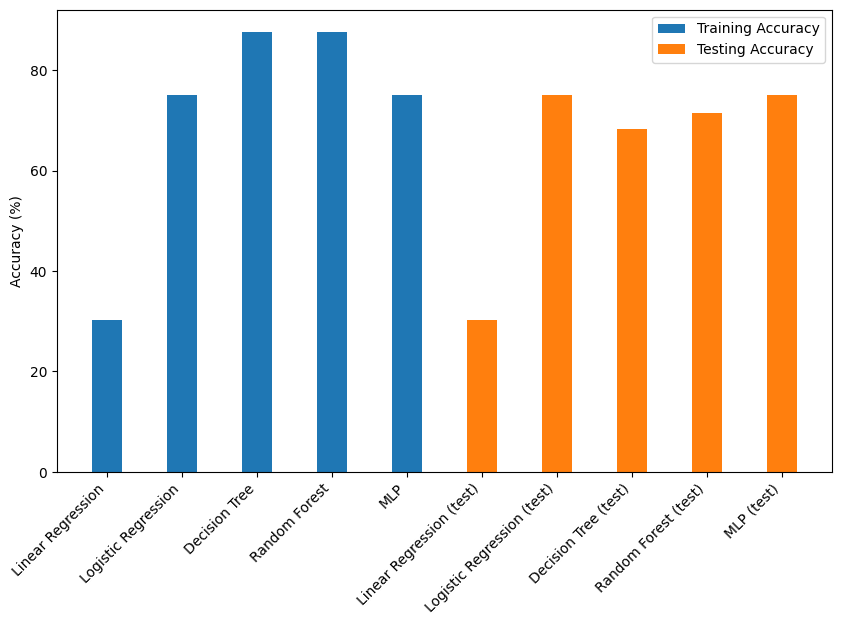

In [ ]:
import matplotlib.pyplot as plt

# Create a list of tuples containing the model name and its accuracy scores
models = [('Linear Regression', lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100),
          ('Logistic Regression', acc_training, acc_testing),
          ('Decision Tree', tree.score(x_train,y_train)*100, tree.score(x_test,y_test)*100),
          ('Random Forest', forest.score(x_train,y_train)*100, forest.score(x_test,y_test)*100),
          ('MLP', acc_training, acc_testing)]

# Create lists for model names, training accuracies, and testing accuracies
model_names = [model[0] for model in models]
training_accs = [model[1] for model in models]
testing_accs = [model[2] for model in models]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_accs, width=0.4, label='Training Accuracy')
plt.bar([name + ' (test)' for name in model_names], testing_accs, width=0.4, label='Testing Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load your dataset
# Assuming you've loaded your dataset into 'res'

# Split the data into features (x) and target (y)
x = res.drop(['Diabetes'], axis=1)
y = res['Diabetes']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape the input data for RNN
# RNNs expect input data in the shape of (batch_size, time_steps, features)
time_steps = 1  # You can experiment with this value
x_train_rnn = x_train.reshape(-1, time_steps, x_train.shape[1])
x_test_rnn = x_test.reshape(-1, time_steps, x_test.shape[1])

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, x_train.shape[1])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_rnn, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
